In [2]:
import mne


In [54]:
import pickle
import numpy as np

# 选择参与者编号（1-32）
participant_id = 1
data_file = f's01.dat'

with open(data_file, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

# 获取生理信号数据和标签
physiological_data = data['data']  # 形状：(40, 40, 8064)
labels = data['labels']  # 形状：(40, 4)

# 提取PPG信号（通道38，索引为37）
ppg_channel_index = 37
ppg_data = physiological_data[:, ppg_channel_index, :]  # 形状：(40, 8064)

# 选择一个试验（视频片段）
trial = 0  # 范围：0到39
ppg_signal = ppg_data[trial]

In [65]:
print(labels.shape) ## 40个test 然后每种分为四项
print(labels)

(40, 4)
[[7.71 7.6  6.9  7.83]
 [8.1  7.31 7.28 8.47]
 [8.58 7.54 9.   7.08]
 [4.94 6.01 6.12 8.06]
 [6.96 3.92 7.19 6.05]
 [8.27 3.92 7.   8.03]
 [7.44 3.73 7.08 7.04]
 [7.32 2.55 6.32 5.87]
 [4.04 3.29 3.62 5.99]
 [1.99 4.86 2.04 7.09]
 [2.99 2.36 3.63 6.24]
 [2.71 2.77 3.4  7.35]
 [1.95 3.12 2.87 6.18]
 [4.18 2.24 3.04 5.04]
 [3.17 8.08 2.91 5.04]
 [6.81 7.44 8.15 7.14]
 [2.46 6.91 6.77 6.41]
 [7.23 7.15 6.94 8.01]
 [7.17 8.   8.1  6.79]
 [8.26 7.91 7.19 8.13]
 [9.   7.95 8.37 7.86]
 [7.09 2.08 7.06 7.37]
 [8.15 3.01 7.37 7.9 ]
 [7.04 7.09 8.01 8.22]
 [8.86 7.21 8.65 7.21]
 [7.28 7.27 7.41 8.24]
 [7.35 6.95 7.03 7.29]
 [3.88 3.35 4.01 7.87]
 [1.36 2.27 3.   8.14]
 [2.08 2.99 3.22 7.33]
 [3.03 8.14 2.86 8.04]
 [2.28 8.   3.27 3.95]
 [3.81 3.85 4.78 5.13]
 [2.28 7.09 7.28 6.92]
 [2.06 8.15 8.05 5.18]
 [2.9  6.92 6.5  3.87]
 [2.31 6.88 3.1  6.77]
 [3.33 7.18 6.54 6.62]
 [3.24 6.18 7.87 6.15]
 [5.1  7.12 6.17 5.97]]


In [68]:
print(ppg_data.shape)

(40, 8064)


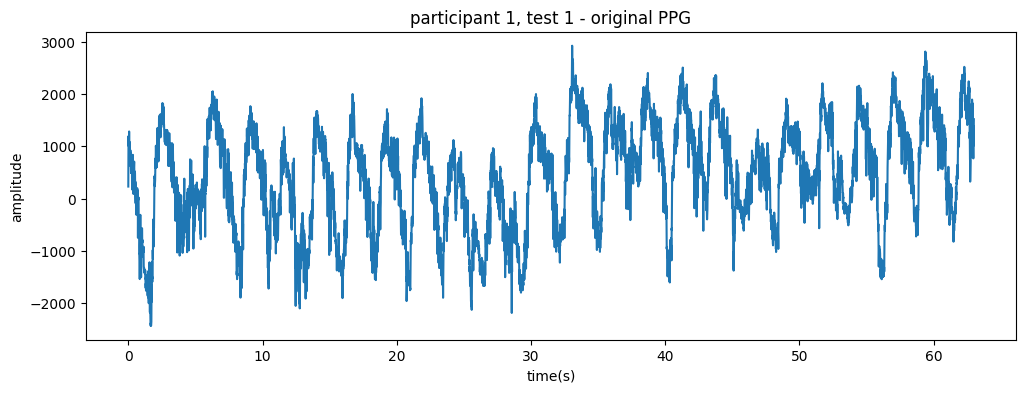

In [58]:
# 设置采样率
fs = 128  # 采样率为128 Hz
time = np.arange(len(ppg_signal)) / fs  # 生成时间轴

# 绘制原始PPG信号
plt.figure(figsize=(12, 4))
plt.plot(time, ppg_signal)
plt.title(f'participant 1, test 1 - original PPG')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.show()

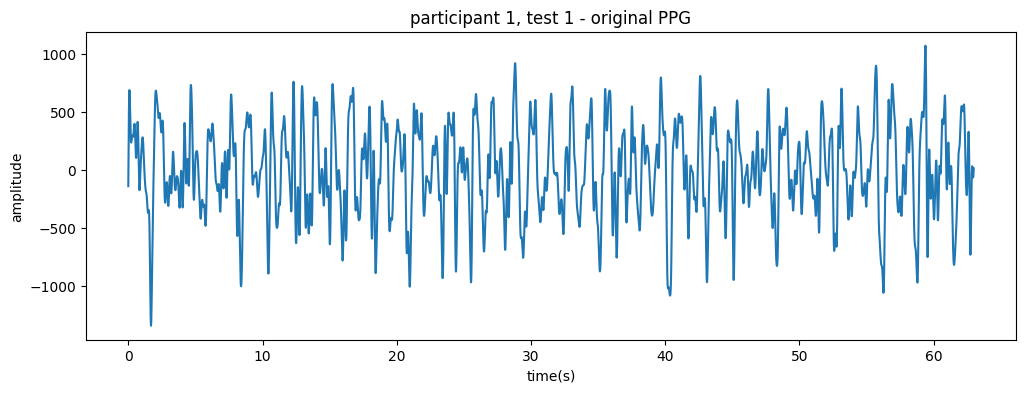

In [60]:
from scipy.signal import butter, filtfilt

### 为了去除高频噪声和基线漂移，我们对信号进行带通滤波（0.5 Hz 到 5 Hz）。
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # 奈奎斯特频率
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, signal)
    return y

# 滤波
filtered_ppg = bandpass_filter(ppg_signal, 0.5, 5, fs)

# 绘制滤波后的PPG信号
plt.figure(figsize=(12, 4))
plt.plot(time, filtered_ppg)
plt.title(f'participant 1, test 1 - original PPG')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.show()

In [61]:
# 获取情感评分
valence = labels[trial, 0]
arousal = labels[trial, 1]
dominance = labels[trial, 2]
liking = labels[trial, 3]

print(f'参与者 {participant_id}，试验 {trial+1} 的情感评分：')
print(f'效价（Valence）：{valence}')
print(f'唤醒度（Arousal）：{arousal}')
print(f'主导度（Dominance）：{dominance}')
print(f'喜好度（Liking）：{liking}')

参与者 1，试验 1 的情感评分：
效价（Valence）：7.71
唤醒度（Arousal）：7.6
主导度（Dominance）：6.9
喜好度（Liking）：7.83


In [70]:
from scipy.signal import find_peaks

# 设置峰值检测参数
min_distance = fs * 0.5  # 最小峰间距，0.5秒（心率不超过每分钟120次）
prominence = 0.5  # 最小峰值突出度，可根据信号特性调整

# 检测峰值
peaks, _ = find_peaks(filtered_ppg, distance=min_distance, prominence=prominence)


In [72]:
print(peaks)

[  11   89  195  263  327  427  504  597  705  802  894  981 1053 1135
 1218 1303 1368 1486 1576 1658 1773 1881 1948 2062 2144 2231 2300 2421
 2569 2634 2725 2795 2863 2937 3020 3102 3167 3233 3316 3411 3480 3553
 3689 3784 3882 3946 4033 4130 4234 4415 4548 4638 4729 4803 4911 5079
 5153 5251 5321 5455 5593 5721 5806 5902 6000 6103 6213 6277 6398 6471
 6542 6615 6708 6802 6885 6958 7054 7131 7286 7392 7462 7602 7705 7787
 7969 8048]


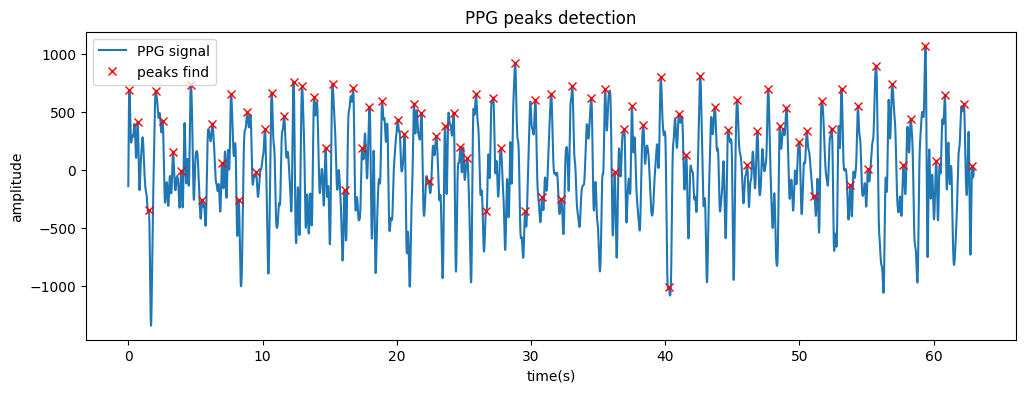

In [74]:
import matplotlib.pyplot as plt

time = np.arange(len(ppg_signal)) / fs

plt.figure(figsize=(12, 4))
plt.plot(time, filtered_ppg, label='PPG signal')
plt.plot(time[peaks], filtered_ppg[peaks], 'rx', label='peaks find')
plt.title('PPG peaks detection')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

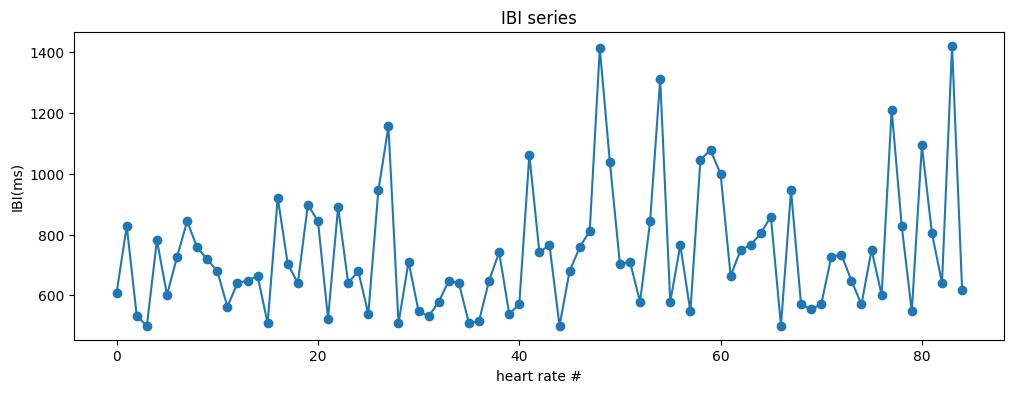

In [79]:
##计算脉搏间期（IBI）序列
##脉搏间期（Inter-Beat Interval，IBI）是相邻脉搏波峰之间的时间差，用于计算HRV特征。

# 计算IBI序列（以秒为单位）
ibi = np.diff(peaks) / fs

# 转换为毫秒
ibi_ms = ibi * 1000

plt.figure(figsize=(12, 4))
plt.plot(ibi_ms, marker='o')
plt.title('IBI series')
plt.xlabel('heart rate #')
plt.ylabel('IBI(ms)')
plt.show()

In [80]:
# 计算时域特征
mean_ibi = np.mean(ibi_ms)
sdnn = np.std(ibi_ms, ddof=1)
diff_ibi = np.diff(ibi_ms)
rmssd = np.sqrt(np.mean(diff_ibi**2))
nn50 = np.sum(np.abs(diff_ibi) > 50)
pnn50 = nn50 / len(diff_ibi) * 100

print(f'均值IBI: {mean_ibi:.2f} ms')
print(f'SDNN: {sdnn:.2f} ms')
print(f'RMSSD: {rmssd:.2f} ms')
print(f'pNN50: {pnn50:.2f} %')
## 这数字感觉不对 应该有问题

均值IBI: 738.69 ms
SDNN: 208.00 ms
RMSSD: 287.62 ms
pNN50: 77.38 %


In [82]:
##这里是 未经清洗的raw 文件，其中Plet应该代表和HRV相关的数据
raw = mne.io.read_raw_bdf('s01.bdf', preload=True)
print(raw.info)

Extracting EDF parameters from C:\Users\Zhongyao Wang\s01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 47 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2010-07-01 10:00:16 UTC
 nchan: 48
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>


In [83]:
print(raw.ch_names)

['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']


和HRV相关的ch是叫Plet